<a href="https://colab.research.google.com/github/Pablot123/sist-recomendacion/blob/main/Copia_de_MINE_4201_SR_Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINE 4201- SR -  Laboratorio 1 
# Exploración modelos KNN



Vamos a utilizar las siguientes librerias en el laboratorio


In [3]:
!pip install numpy
!pip install scikit-surprise
!pip install pandas
!pip install seaborn

     |████████████████████████████████| 11.8MB 6.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618282 sha256=89aa41229e6e3431b0072295a2b14d60e73db0fce0445914c48fcb7691467e9d
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [6]:
pwd


'D:\\workspace-uniandes\\sist-recomendacion'

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import random

#Para garantizar reproducibilidad en resultados
seed = 10
random.seed(seed)
np.random.seed(seed)


## Suba al servidor los archivos u.data y u.item que se encuentran en el dataset descargado, en la pestaña files

In [13]:
if not (os.path.exists('./content/u.data') and os.path.exists('./content/u.item')):
  raise ValueError('Los archivos u.data e u.item no fueron encontrados en el path')
else:
  print("Los archivos han sido cargados")

Los archivos han sido cargados


In [15]:
ratings=pd.read_csv('./content/u.data', sep = '\t', names = [ 'user_id', 'item_id', 'rating', 'timestamp' ] )

In [16]:
items=pd.read_csv('./content/u.item', sep = '\|', names = ['movie id' ,'movie title','release date','video release date','IMDb URL ','unknown',
                                                          'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama',
                                                          'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'], encoding='latin-1' )

<ipython-input-16-dad7e3c21798>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  items=pd.read_csv('./content/u.item', sep = '\|', names = ['movie id' ,'movie title','release date','video release date','IMDb URL ','unknown',


Verifique que los ratings y los items hayan sido cargados correctamente





In [17]:
ratings.head()



,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
# Se cambia el índice por la columna movie id
items=items.set_index(items['movie id'])

In [19]:
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Visualice la distribución de ratings, ¿Qué puede decir al respecto?

<AxesSubplot:xlabel='count', ylabel='rating'>

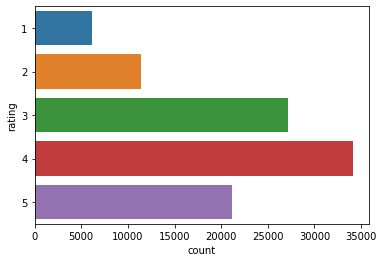

In [20]:
sns.countplot(y='rating', data=ratings)
#ratings.describe()

La peliculas tienen unn buen nivel de aceptacion.
Hay una mayor distrubicuon hacia los ratings altos.


## En la siguiente celda se esta calculando el número de ratings por usuario y  el promedio de sus calificaciones, el dataframe esta ordenado por el número de calificaciones

In [24]:
ratings.groupby('user_id')['rating'].agg({'count','mean'}).sort_values(by='count', ascending=False)

,count,mean
user_id,,
405,737,1.834464
655,685,2.908029
13,636,3.097484
450,540,3.864815
276,518,3.465251
...,...,...
685,20,2.050000
475,20,3.600000
36,20,3.800000


##Utilice las siguientes celdas para encontrar respuesta a las siguientes preguntas

¿Cómo es la distribución del número de ratings por usuario?

¿Cómo es la distribución del promedio de calificación por usuario?


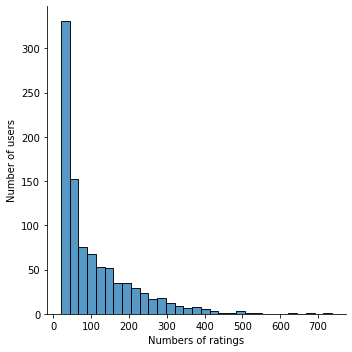

In [25]:
df_rating_agrupada=ratings.groupby('user_id')['rating'].agg({'count','mean'}).sort_values(by='count', ascending=False)
g = sns.displot(data=df_rating_agrupada, x='count')
g.set_axis_labels("Numbers of ratings","Number of users")

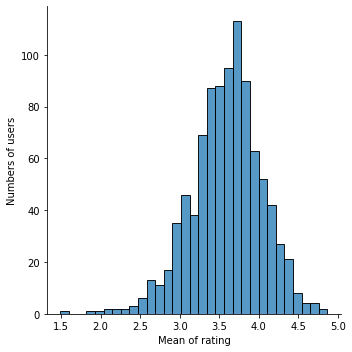

In [26]:

g_dos = sns.displot(data=df_rating_agrupada, x='mean')
g_dos.set_axis_labels("Mean of rating","Numbers of users")


##En la siguiente celda se esta calculando el número de ratings por items, el promedio de sus calificaciones y la varianza de sus calificaciones. 

In [27]:
df_items = ratings.groupby('item_id')['rating'].agg({'count','mean','var'}).join(items['movie title'], how='left')
df_items

,count,mean,var,movie title
item_id,,,,
1,452,3.878319,0.860992,Toy Story (1995)
2,131,3.206107,0.934116,GoldenEye (1995)
3,90,3.033333,1.470787,Four Rooms (1995)
4,209,3.550239,0.931358,Get Shorty (1995)
5,86,3.302326,0.895759,Copycat (1995)
...,...,...,...,...
1678,1,1.000000,NaN,Mat' i syn (1997)
1679,1,3.000000,NaN,B. Monkey (1998)
1680,1,2.000000,NaN,Sliding Doors (1998)


##Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

¿Cuáles son los items con más calificaciones?  

¿Se puede observar el fenomeno de cola larga en este dataset?, evidencielo por medio de un gráfico




In [28]:
df_items_sort = df_items.nlargest(10,'count')
df_items_sort

,count,mean,var,movie title
item_id,,,,
50,583,4.358491,0.776762,Star Wars (1977)
258,509,3.803536,0.988885,Contact (1997)
100,508,4.155512,0.952100,Fargo (1996)
181,507,4.007890,0.853693,Return of the Jedi (1983)
294,485,3.156701,1.206799,Liar Liar (1997)
286,481,3.656965,1.367498,"English Patient, The (1996)"
288,478,3.441423,1.240796,Scream (1996)
1,452,3.878319,0.860992,Toy Story (1995)
300,431,3.631090,0.996147,Air Force One (1997)


<AxesSubplot:xlabel='item_id'>

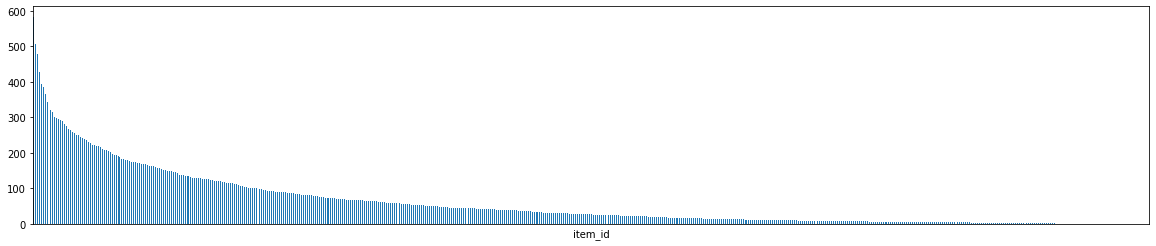

In [29]:
df_items = df_items.sort_values('count',ascending=False)
df_items['count'].plot(kind='bar', xticks=[], figsize=(20,4))

## Creación de listas de recomendación no personalizadas

Genere inicialmente una lista de recomendación de tamaño 10 no personalizada con los items con mejor promedio, en teoría estos serían los mejores items del dataset y una buena lista inicial con los elementos más aclamados por los usuarios del sistema

¿Qué problemas tiene generar una lista no personalizada solamente con el promedio?

¿Es posible generar una mejor lista de recomendación teniendo en cuenta que tanto el número de ratings del item como su promedio? 

Cree una lista top 10 con los mejores items globales siguiendo la estrategia seleccionada

Ver: 

http://www.evanmiller.org/how-not-to-sort-by-average-rating.html

https://es.wikipedia.org/wiki/Intervalo_de_confianza


In [30]:
df_items.nlargest(10,'mean')

,count,mean,var,movie title
item_id,,,,
1293,3,5.0,0.0,Star Kid (1997)
1189,3,5.0,0.0,Prefontaine (1997)
1500,2,5.0,0.0,Santa with Muscles (1996)
1467,2,5.0,0.0,"Saint of Fort Washington, The (1993)"
1201,1,5.0,NaN,Marlene Dietrich: Shadow and Light (1996)
814,1,5.0,NaN,"Great Day in Harlem, A (1994)"
1653,1,5.0,NaN,Entertaining Angels: The Dorothy Day Story (1996)
1122,1,5.0,NaN,They Made Me a Criminal (1939)
1536,1,5.0,NaN,Aiqing wansui (1994)


In [31]:
#se calcula un score de acuerdo al numero de ratings y el promedio
total=df_items.shape[0]
df_items['peso']=df_items['count']/total
df_items['score']=df_items['mean']*df_items['peso']
df_items.nlargest(10,'score')

,count,mean,var,movie title,peso,score
item_id,,,,,,
50,583,4.358491,0.776762,Star Wars (1977),0.346611,1.510702
100,508,4.155512,0.952100,Fargo (1996),0.302021,1.255054
181,507,4.007890,0.853693,Return of the Jedi (1983),0.301427,1.208086
258,509,3.803536,0.988885,Contact (1997),0.302616,1.151011
174,420,4.252381,0.795340,Raiders of the Lost Ark (1981),0.249703,1.061831
127,413,4.283293,0.873434,"Godfather, The (1972)",0.245541,1.051724
286,481,3.656965,1.367498,"English Patient, The (1996)",0.285969,1.045779
1,452,3.878319,0.860992,Toy Story (1995),0.268728,1.042212
98,390,4.289744,0.699895,"Silence of the Lambs, The (1991)",0.231867,0.994649


In [32]:
import math
import scipy.stats as st

def wilson_lower_bound(pos, n, confidence=0.95):
    """
    Function to provide lower bound of wilson score
    :param pos: No of positive ratings
    :param n: Total number of ratings
    :param confidence: Confidence interval, by default is 95 %
    :return: Wilson Lower bound score
    """
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * pos / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [33]:
"""
1. Filtrar los ratings mayores a 3 como positivos. 
2. Contarlos por item_id.
3. Anexar ese conteo de positivos como una columna nueva y guardar en el dataset
    df_wilson
4. Calcular wilson_lower_bound para cada item y guardarlo en la columna 'wilson'
5. Calcular el top 10 con la columna wilson

"""
ratings_positivos=ratings[ratings.rating>3]
df_ratings_positivos=ratings_positivos.groupby('item_id')['rating'].agg({'count'})
df_ratings_positivos.rename(columns={'count':'positive_count'},inplace=True)

df_wilson=df_items.join(df_ratings_positivos,how='left')
df_wilson['wilson']=df_wilson.apply(lambda x: wilson_lower_bound(x['positive_count'],x['count']),axis=1)
df_wilson.nlargest(10,'wilson')

,count,mean,var,movie title,peso,score,positive_count,wilson
item_id,,,,,,,,
64,283,4.445230,0.588302,"Shawshank Redemption, The (1994)",0.168252,0.747919,255.0,0.860721
479,179,4.251397,0.470153,Vertigo (1958),0.106421,0.452438,162.0,0.853180
318,298,4.466443,0.687422,Schindler's List (1993),0.177170,0.791320,265.0,0.848561
98,390,4.289744,0.699895,"Silence of the Lambs, The (1991)",0.231867,0.994649,344.0,0.846252
483,243,4.456790,0.530150,Casablanca (1942),0.144471,0.643876,216.0,0.843167
603,209,4.387560,0.507729,Rear Window (1954),0.124257,0.545184,185.0,0.834824
427,219,4.292237,0.547233,To Kill a Mockingbird (1962),0.130202,0.558859,193.0,0.831731
50,583,4.358491,0.776762,Star Wars (1977),0.346611,1.510702,501.0,0.828769
357,264,4.291667,0.709284,One Flew Over the Cuckoo's Nest (1975),0.156956,0.673603,230.0,0.825421


#Creación del dataset de entrenamiento y prueba

El próximo paso es cargar los datos a surprise, para esto vamos a inicializar un modelo de datos de surprise con la información de los ratings cargados en el dataframe

In [34]:
reader = Reader( rating_scale = ( 1, 5 ) )
#Se crea el dataset a partir del dataframe
surprise_dataset = Dataset.load_from_df( ratings[ [ 'user_id', 'item_id', 'rating' ] ], reader )

Se divide el dataset en entrenamiento y test. El dataset de entrenamiento será presentado al algoritmo de recomendación y el dataset de test nos servirá para medir qué tan buenas fueron las predicciones del sistema de recomendación. El conjunto de test generado es una lista con los ratings de prueba

In [35]:
train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)

In [36]:
train_set.n_ratings

80000

In [37]:
len(test_set)

20000

In [38]:
#Este es el primer elemento del dataset de prueba (usuario 154, pelicula 302, rating 4)
test_set[0]

(154, 302, 4.0)

## Creación de modelo de filtrado colaborativo basado en similitud con usuarios o items cercanos

Surprise cuenta con la implementación de los modelos colaborativos dentro de la clase [KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html) 

El modelo recibe los siguientes parámetros: 


*   k: El máximo número de vecinos con el que se hará la extrapolación
*   min_k : El mínimo número de vecinos con el que se extrapolará un rating
*   sim_options : Opciones de similitud pasadas como un diccionario de python, aqui se le configura al modelo el tipo de similitud a usar para encontrar los vecinos y si la extrapolación debe hacerse usando usuarios o items similares. Revise el formato y similitudes disponibles en surprise en [este link](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measure-configuration)





In [39]:
# se crea un modelo knnbasic item-item con similitud coseno 
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)

In [40]:
#Se le pasa la matriz de utilidad al algoritmo 
algo.fit(trainset=train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Una vez cargados los ratings al modelo, se puede realizar una predicción para un usuario, en este caso vamos a calcular la predicción que el modelo esta realizando para la primera entrada del dataset de test la predicción para el usuario con id 154 y el item con id 302, que corresponde a la película L.A. Confidential (1997)

---



In [41]:
#Verifique la propiedad est de la predicción
algo.predict(154,302)

Prediction(uid=154, iid=302, r_ui=None, est=4.249202065377386, details={'actual_k': 20, 'was_impossible': False})

In [42]:
items[items['movie id']==302]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
302,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


Como podemos ver, la predicción (4.24) del modelo no esta alejada de lo que realmente opinó el usuario  (4.0)

Para medir la calidad de la predicción para todos los usuarios e items del dataset de prueba, vamos a comparar lo que dice el modelo de predicción vs lo que dice el conjunto de prueba, para esto vamos a usar la métrica [RMSE](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.rmse)

Inicialmente calculamos la predicción para todos los elementos del conjunto de test

In [43]:
test_predictions=algo.test(test_set)

In [44]:
#5 primeras predicciones
test_predictions[0:5]

[Prediction(uid=154, iid=302, r_ui=4.0, est=4.249202065377386, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=896, iid=484, r_ui=4.0, est=2.8976616922320964, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=230, iid=371, r_ui=4.0, est=4.1968378983432535, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=234, iid=294, r_ui=3.0, est=3.0978778071364186, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=25, iid=729, r_ui=4.0, est=4.148885433441103, details={'actual_k': 20, 'was_impossible': False})]

Ahora se mide el RMSE de las predicciones vs el valor del dataset

In [45]:
# En promedio, el sistema encuentra ratings que estan una estrella por encima o por debajo del rating del usuario
accuracy.rmse( test_predictions, verbose = True )

RMSE: 1.0453


1.0453343976192102

##Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

¿Cuál es el RMSE de un modelo usuario-usuario con los mismos parámetros de similitud?

¿Cuál es el efecto de cambiar el número de vecinos en la calidad del modelo usuario-usuario ? 

Pruebe para un número diferente de vecinos (e.j 5, 10, 20, 50, 100)

In [47]:
# se crea un modelo knnbasic item-item con similitud coseno 
sim_options = {'name': 'cosine',
               'user_based': True  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(trainset=train_set)
test_predictions=algo.test(test_set)
resp= accuracy.rmse( test_predictions, verbose = True )
print ('resp: '+str(resp))


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0166
resp: 1.0166414414593592


In [48]:

resultados=[]
for i in (5,10,20,50,100):
    algo = KNNBasic(k=i, min_k=2, sim_options=sim_options)
    algo.fit(trainset=train_set)
    test_predictions=algo.test(test_set)
    resp= accuracy.rmse( test_predictions, verbose = False )
    resultados.append('Para k='+str(i)+' RMSE: '+str(resp))


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [49]:
for i in range(len(resultados)):
    print (resultados[i])

Para k=5 RMSE: 1.0838620997926653
Para k=10 RMSE: 1.0385724992200804
Para k=20 RMSE: 1.0166414414593592
Para k=50 RMSE: 1.0094939948005999
Para k=100 RMSE: 1.0113077032099977


##Generando listas de predicciones para los usuarios

Retomemos nuestro modelo inicial y ajustémolo con todos los ratings disponibles

Para generar una lista de recomendación se debe crear un dataset de "test" con las entradas faltantes de la matriz utilidad para que el modelo cree las predicciones (terminar de llenar la matriz de utilidad)



In [50]:
#Se crea el dataset para modelo 
rating_data=surprise_dataset.build_full_trainset()
# Se crea dataset de "prueba" con las entradas faltantes para generar las predicciones
test=rating_data.build_anti_testset()

# se crea el mismo modelo que el del ejemplo
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(rating_data)
predictions=algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [51]:
#10 primeras predicciones
predictions[0:10]

[Prediction(uid=196, iid=302, r_ui=3.52986, est=3.4998074068929244, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=377, r_ui=3.52986, est=3.531852919263047, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=51, r_ui=3.52986, est=3.59549677885145, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=346, r_ui=3.52986, est=3.5471070543165877, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=474, r_ui=3.52986, est=3.7990088769026116, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=265, r_ui=3.52986, est=3.4464297466659812, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=465, r_ui=3.52986, est=3.5022156502733557, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=451, r_ui=3.52986, est=3.6948301041629965, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=86, r_ui=3.52986, e

In [52]:
#Predicciones para usuario 196
user_predictions=list(filter(lambda x: x[0]==196,predictions))

In [53]:
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)

In [54]:
#tomamos las 10 primeras predicciones
user_predictions=user_predictions[0:10]

In [55]:
user_predictions

[Prediction(uid=196, iid=1309, r_ui=3.52986, est=4.5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=196, iid=1310, r_ui=3.52986, est=4.5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=196, iid=1676, r_ui=3.52986, est=4.25, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid=196, iid=1675, r_ui=3.52986, est=4.25, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid=196, iid=1289, r_ui=3.52986, est=4.202435603862276, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1643, r_ui=3.52986, est=4.097225899300029, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1593, r_ui=3.52986, est=4.090909090909091, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid=196, iid=935, r_ui=3.52986, est=4.05136705364539, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1216, r_ui=3.52986, est=4.0506920732628675, details={'actual_k': 20, 'was_i

In [56]:
#Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)

In [57]:
df_predictions

,movie id,estimation
0,1309,4.500000
1,1310,4.500000
2,1676,4.250000
3,1675,4.250000
4,1289,4.202436
5,1643,4.097226
6,1593,4.090909
7,935,4.051367
8,1216,4.050692
9,1312,4.049247


In [58]:
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie title','IMDb URL ']], how='left', right_index=True, left_on='movie id')

,movie id,estimation,movie title,IMDb URL
0,1309,4.500000,"Very Natural Thing, A (1974)",http://us.imdb.com/M/title-exact?Very%20Natura...
1,1310,4.500000,"Walk in the Sun, A (1945)",http://us.imdb.com/M/title-exact?Walk%20in%20t...
2,1676,4.250000,"War at Home, The (1996)",http://us.imdb.com/M/title-exact?War%20at%20Ho...
3,1675,4.250000,"Sunchaser, The (1996)","http://us.imdb.com/M/title-exact?Sunchaser,%20..."
4,1289,4.202436,Jack and Sarah (1995),http://us.imdb.com/M/title-exact?Jack%20and%20...
5,1643,4.097226,Angel Baby (1995),http://us.imdb.com/Title?Angel+Baby+(1995/I)
6,1593,4.090909,Death in Brunswick (1991),http://us.imdb.com/M/title-exact?Death%20in%20...
7,935,4.051367,Paradise Road (1997),http://us.imdb.com/M/title-exact?Paradise%20Ro...
8,1216,4.050692,Kissed (1996),http://us.imdb.com/M/title-exact?Kissed%20%281...
9,1312,4.049247,"Pompatus of Love, The (1996)",http://us.imdb.com/M/title-exact?Pompatus%20of...


## Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

Cree al menos 2 usuarios (al primero asígnele el id 944) y cree para cada usuario ratings nuevos (puede hacerlo haciendo a traves del [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html), o añadiendo líneas al archivo). Asigne a un usuario preferencias de un segmento popular (mainstream) y a otro preferencias de un nicho.

¿Que tan bien cree que el sistema esta respondiendo a los gustos del usuario?

¿Que tan bien cree que el sistema esta respondiendo al objetivo de buscar items para el usuario dentro de la cola larga?

In [60]:
ratings['user_id'].max()+1

944

In [59]:
"""
Se agregan dos usuarios:
Uno con películas del mainstream y otro con películas de nicho
Y se anexan al set de datos de ratings: new_ratings
"""

import time
#usuasrio mainstream
df2 = pd.DataFrame(np.array([
        [944, 935, 3, time.time()], 
        [944, 1216, 4, time.time()], 
        [944, 1309, 4, time.time()],
        [944,  1593, 5, time.time()]    
    ]),
    columns=['user_id', 'item_id', 'rating','timestamp'],
    dtype=int
)

#usuario nicho westerns
df3=pd.DataFrame(np.array([
        [945, 51, 3, time.time()], 
        [945, 73, 4, time.time()], 
        [945, 97, 4, time.time()],
        [945,  177, 5, time.time()]    
    ]),
    columns=['user_id', 'item_id', 'rating','timestamp'],
    dtype=int
)

new_ratings=ratings.append(df2)
new_ratings=new_ratings.append(df3)
new_ratings=new_ratings.reset_index(drop=True)

In [ ]:
"""
Se ejecuta de nuevo el algoritmo KNNBasic con el dataset nuevo
y se obtienen predicciones

"""
surprise_dataset = Dataset.load_from_df( new_ratings[ [ 'user_id', 'item_id', 'rating' ] ], reader )

#Se crea el dataset para modelo 
rating_data=surprise_dataset.build_full_trainset()
# Se crea dataset de "prueba" con las entradas faltantes para generar las predicciones
test=rating_data.build_anti_testset()

# se crea el mismo modelo que el del ejemplo
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(rating_data)
predictions=algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
"""
Se obtienen las diez primeras predicciones para los usuarios: 944 y 945

"""
#Predicciones para usuario 944
user_predictions_A=list(filter(lambda x: x[0]==944,predictions))
#Ordenamos de mayor a menor estimación de relevancia
user_predictions_A.sort(key=lambda x : x.est, reverse=True)
#tomamos las 10 primeras predicciones
user_predictions_A=user_predictions_A[0:10]


#Predicciones para usuario 945
user_predictions_B=list(filter(lambda x: x[0]==945,predictions))
#Ordenamos de mayor a menor estimación de relevancia
user_predictions_B.sort(key=lambda x : x.est, reverse=True)
#tomamos las 10 primeras predicciones
user_predictions_B=user_predictions_B[0:10]

In [ ]:
#Se convierte a dataframe pra ver los resultados finales
labels = ['user id','movie id', 'estimation']
df_predictions_A = pd.DataFrame.from_records(list(map(lambda x: (x.uid, x.iid, x.est) , user_predictions_A)), columns=labels)
df_predictions_B = pd.DataFrame.from_records(list(map(lambda x: (x.uid, x.iid, x.est) , user_predictions_B)), columns=labels)
df_predictions_final=df_predictions_A.append(df_predictions_B)
df_predictions_final=df_predictions_final.merge(items[['movie title','IMDb URL ']], how='left', right_index=True, left_on='movie id')
df_predictions_final